# Import and create function

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from data import Data
from ml_model import DNN, RNN


# This is the true unknown, one-dimensional function we are trying to approximate
F = [
    lambda x: np.cos(2*np.pi+np.sum(x,1)),
    lambda x: np.prod((x-0.5)**2,1),
    lambda x: (1+np.sum(x,1))**-2,
    lambda x: np.exp(-np.sum((x-0.5)**2,1)),
    lambda x: np.exp(-np.sum(np.abs(x-0.5),1)),
    lambda x: np.any(x>0.5)*(np.exp(np.sum(x,1)))
]

# Select a test function

In [2]:
f = F[-1]

# Run a loop

N 10.0
### start training for 25 epochs
### training finish 

N 2507.5
### start training for 25 epochs
### training finish 

N 5005.0
### start training for 25 epochs
### training finish 

N 7502.5
### start training for 25 epochs
### training finish 

N 10000.0
### start training for 25 epochs
### training finish 

N 10.0
### start training for 25 epochs
### training finish 

N 2507.5
### start training for 25 epochs
### training finish 

N 5005.0
### start training for 25 epochs
### training finish 

N 7502.5
### start training for 25 epochs
### training finish 

N 10000.0
### start training for 25 epochs
### training finish 

N 10.0
### start training for 25 epochs
### training finish 

N 2507.5
### start training for 25 epochs
### training finish 

N 5005.0
### start training for 25 epochs
### training finish 

N 7502.5
### start training for 25 epochs
### training finish 

N 10000.0
### start training for 25 epochs
### training finish 



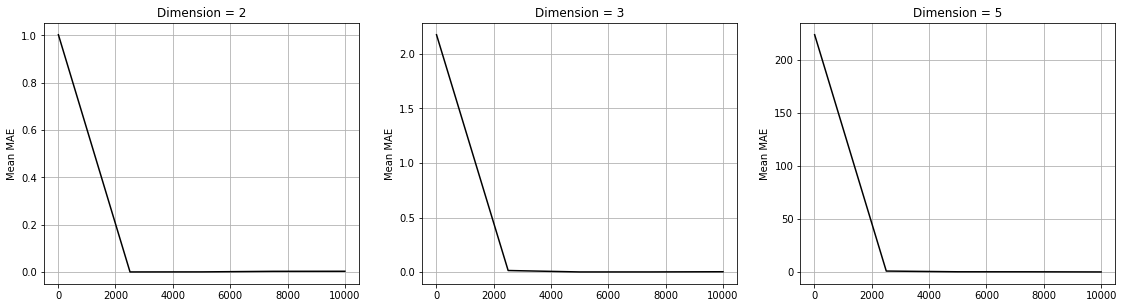

<Figure size 921.6x345.6 with 0 Axes>

<Figure size 921.6x345.6 with 0 Axes>

<Figure size 921.6x345.6 with 0 Axes>

In [3]:
# fig = plt.figure(figsize=(6.4 * 3, 4.8 * 1))
fig, axs = plt.subplots(1,3,figsize=(6.4 * 3, 4.8 * 1))
k = 0
for D in [2,3,5]:

    # This is the kernel function
    # Here we run the tes
    res = []
    plt.figure(figsize=(6.4 * 2, 4.8 * 1))
    res = pd.DataFrame()
    for N in np.linspace(10,10*1000,5):
        # todo vary what N represents
        print('N',N)

        n = 1000

        data = Data()
        data.random_data_with_f(f,D=D,N=N)

        model=DNN()
        model.create_model(data,activation='swish')
        model.train_model(data=data,verbose=0,epoch=25)

        pred=model.model.predict(data.X_tr)
        pred_va=model.model.predict(data.X_va)
        pred_te=model.model.predict(data.X_te)

        data.X_te==data.X_va
        np.round(data.y_tr - pred)
        tr=np.mean(np.square(data.y_tr - pred))
        va=np.mean(np.square(data.y_va - pred_va))
        te=np.mean(np.square(data.y_te - pred_te))
        res=res.append(pd.DataFrame(data={'tr':[tr],'va':[va],'te':[te]},index=[N]))

    # plt.subplot(1, 3, k)
    axs[k].plot(res.index, res['te'], color='k', label='Mean MSE')
    axs[k].set_title(f'Dimension = {D}')
    axs[k].grid()
    axs[k].set_ylabel('Mean MAE')
    k += 1


plt.show()


# MNIST Data set

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 400)               26000     
_________________________________________________________________
dense_61 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_62 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_63 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_64 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_65 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_66 (Dense)             (None, 400)             

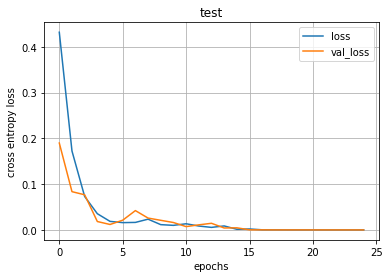

        Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
True 0           20            0            0            0            0   
True 1            0           18            0            0            0   
True 2            0            0           16            0            0   
True 3            0            0            0           17            0   
True 4            0            0            0            0           17   
True 5            0            0            0            0            0   
True 6            0            0            0            0            0   
True 7            0            0            0            0            0   
True 8            0            0            0            0            0   
True 9            0            0            0            0            0   

        Predicted 5  Predicted 6  Predicted 7  Predicted 8  Predicted 9  
True 0            0            0            0            0            0  
True 1            0       

In [4]:
data = Data()
data.load_mnist()
model=DNN()
model.create_model(data,architecture=[400,400,400,400,400,400,400],activation='swish',verbose=1)

model.train_model(data,epoch=25,verbose=0)
model.hist_training
model.show_performance(label_='test',data=data)
